# 🍷 Intro to Data Discovery & Classification with the Wine Dataset

Welcome to this hands-on workshop!  
In this session, we’ll learn the basics of **data discovery** and **machine learning classification** using the famous **Wine dataset**.  

---

## 📊 About the Dataset
The **Wine dataset** is a classic dataset from the UCI Machine Learning Repository, also available in scikit-learn.  
It contains measurements of **13 chemical properties** of wine (such as alcohol content, flavanoids, color intensity, etc.) from samples of three different cultivars (types of wine).  


## 🍇 The Three Wine Cultivars (Target Classes)

The Wine dataset comes from chemical analyses of wines grown in the same region of Italy, but from **three different grape varieties (cultivars)**.  
In the dataset, these are labeled as `0`, `1`, and `2`, but they correspond to real grapes with distinct wine styles:

---

### 🔢 Class 0 → **Cultivar 1: Nebbiolo**
- Famous for wines like **Barolo** and **Barbaresco**.  
- Typically **high in tannin, acidity, and alcohol**.  
- Bold, structured wines that **age very well**.  
- In the dataset: often higher in **alcohol** and **malic acid**.

---

### 🔢 Class 1 → **Cultivar 2: Barbera**
- A more **approachable, fruit-forward** wine.  
- Usually **lighter-bodied**, with **lower tannins** but **higher acidity**.  
- Known for freshness and versatility.  
- In the dataset: often higher in **flavanoids** and **color intensity**.

---

### 🔢 Class 2 → **Cultivar 3: Grignolino**
- A **lighter, more delicate** wine.  
- **Pale in color**, with **lighter tannins** and **lower alcohol**.  
- Floral, aromatic, and best enjoyed young.  
- In the dataset: often higher in **proline** (linked to grape ripeness) and distinct magnesium/phenol profiles.

---

## 🧾 Why This Matters
- These aren’t just abstract class numbers — they represent **real grape varieties** with unique characteristics.  
- Our task is to use **chemical attributes** (like alcohol, flavanoids, proline) to predict which grape variety the wine came from.  
- This helps show how machine learning can turn raw data into insights that even a winemaker would find meaningful!


- **Features (X):** 13 continuous chemical attributes (e.g., alcohol, malic acid, ash, magnesium, etc.)  
- **Target (y):** Wine cultivar (3 classes: `0`, `1`, `2`)  

This dataset is small but powerful for learning because:
- It is well-structured (no missing values).  
- It allows us to explore correlations between features.  
- It’s a perfect introduction to supervised classification problems.  

---

## 🎯 Workshop Goals
During this notebook, we will:
1. **Load & explore the dataset**  
   - Understand the features and targets  
   - Perform basic statistical summaries  
   - Visualize data distributions and correlations  

2. **Visualize the dataset**  
   - Use plots to find patterns  
   - Apply Principal Component Analysis (PCA) to see clustering  

3. **Build simple classification models**  
   - Logistic Regression (linear baseline)  
   - Decision Tree Classifier (interpretable non-linear model)  
   - Evaluate performance using accuracy and classification reports  

4. **Experiment & extend**  
   - Try tuning model parameters  
   - Compare different algorithms  
   - Think about what features matter most  

---

✅ By the end, you’ll understand how to:
- Explore a new dataset,  
- Visualize its properties,  
- Train and evaluate simple machine learning models.  

Let’s dive in!


In [0]:
#https://rtxusers.sharepoint.us/sites/AIMLCenterofExcellence-CORP/SitePages/Resources-for-AIML.aspx?csf=1&web=1&e=xyrHMW&CID=b0b0bc04-f19b-4407-92ae-0083a4449033

from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Map target numbers to wine class names
target_names = wine.target_names
df['wine_class'] = df['target'].map({0: target_names[0], 1: target_names[1], 2: target_names[2]})

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


visualization concepts

In [0]:
## add your code here


STEP 2: DATA DISCOVERY
📊 DATASET OVERVIEW
------------------------------
Total samples: 178
Total features: 13
Missing values: 0

🍇 CLASS DISTRIBUTION
------------------------------
1    71
0    59
2    48
Name: target, dtype: int64


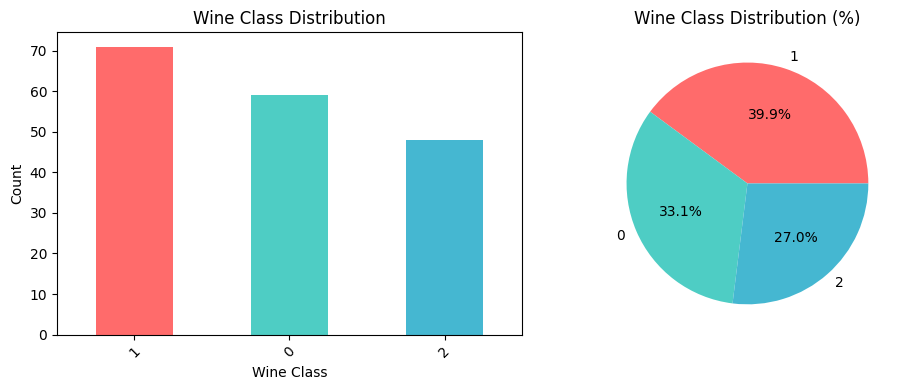


📈 STATISTICAL SUMMARY
------------------------------
          alcohol  malic_acid  ...      proline      target
count  178.000000  178.000000  ...   178.000000  178.000000
mean    13.000618    2.336348  ...   746.893258    0.938202
std      0.811827    1.117146  ...   314.907474    0.775035
min     11.030000    0.740000  ...   278.000000    0.000000
25%     12.362500    1.602500  ...   500.500000    0.000000
50%     13.050000    1.865000  ...   673.500000    1.000000
75%     13.677500    3.082500  ...   985.000000    2.000000
max     14.830000    5.800000  ...  1680.000000    2.000000

[8 rows x 14 columns]


In [0]:
# =============================================================================
# 3. DATA DISCOVERY AND EXPLORATION
# =============================================================================

print("\n" + "="*60)
print("STEP 2: DATA DISCOVERY")
print("="*60)

# Basic information about the dataset
print("📊 DATASET OVERVIEW")
print("-" * 30)
print(f"Total samples: {len(df)}")
print(f"Total features: {len(df.columns) - 2}")  # Excluding target and wine_class
print(f"Missing values: {df.isnull().sum().sum()}")

# Class distribution
print("\n🍇 CLASS DISTRIBUTION")
print("-" * 30)
class_counts = df['target'].value_counts()
print(class_counts)

# Visualize class distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Wine Class Distribution')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Wine Class Distribution (%)')

plt.tight_layout()
plt.show()

# Statistical summary
print("\n📈 STATISTICAL SUMMARY")
print("-" * 30)
print(df.describe())

## 🔍 Visualizing with PCA (Principal Component Analysis)

Now that we’ve explored the features individually, let’s see how we can **reduce the complexity** of the dataset while still keeping most of the important information.

**Principal Component Analysis (PCA)** is a technique that:
- Finds new “axes” (called *principal components*) that capture the most variation in the data.  
- Lets us project high-dimensional data (13 features here) into 2 or 3 dimensions for visualization.  
- Helps us see patterns, clusters, or separations between classes that may not be obvious in the raw features.

👉 In this step:
- We’ll reduce the 13 wine features down to **2 principal components**.  
- Then, we’ll plot these 2D points and color them by wine class.  
- This will give us a visual sense of how well the classes separate in the feature space.  

⚠️ Remember: PCA is a tool for **exploration and visualization**, not a classifier itself. It helps us understand structure in the data.



STEP 3: FEATURE EXPLORATION
🔍 FEATURE NAMES AND DESCRIPTIONS
----------------------------------------
 1. alcohol
 2. malic_acid
 3. ash
 4. alcalinity_of_ash
 5. magnesium
 6. total_phenols
 7. flavanoids
 8. nonflavanoid_phenols
 9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

📊 FEATURE CORRELATIONS
------------------------------


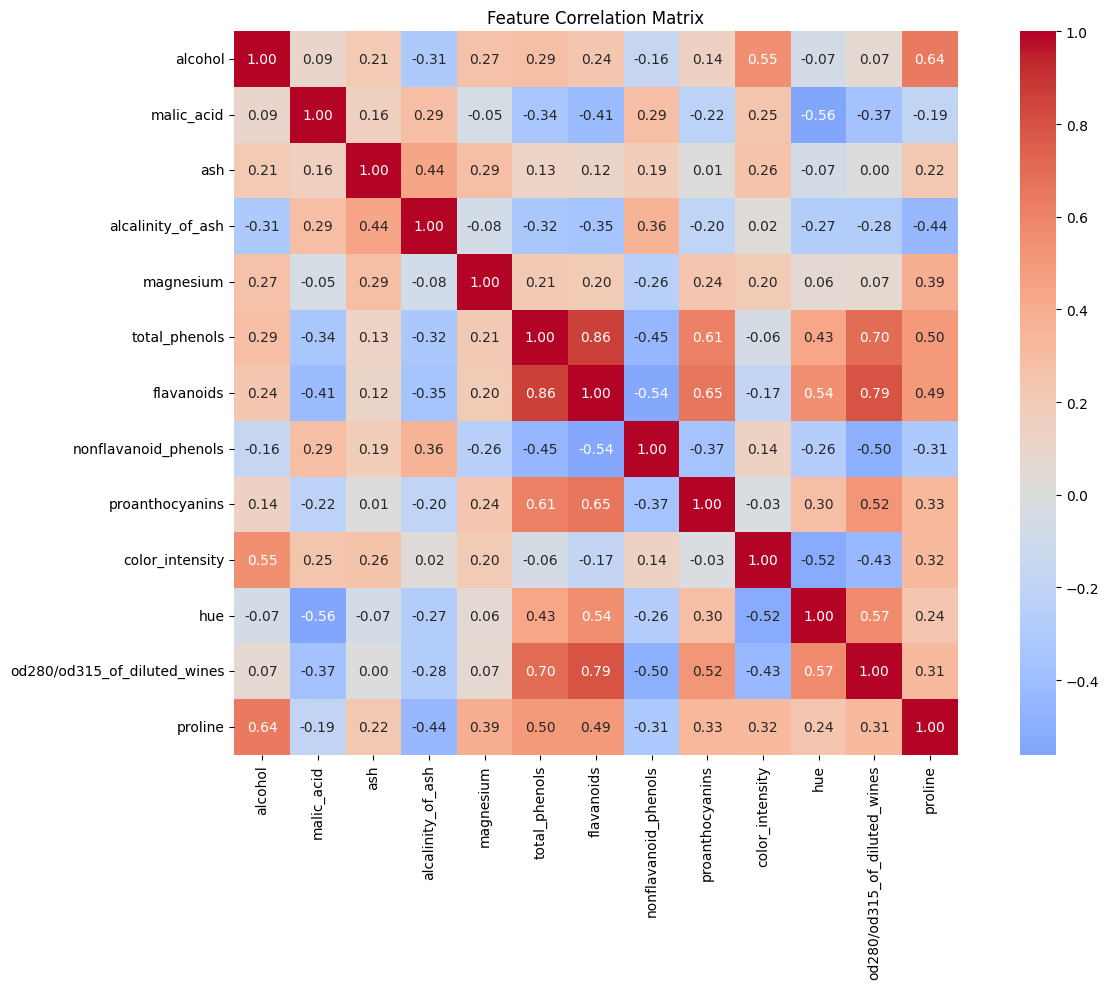

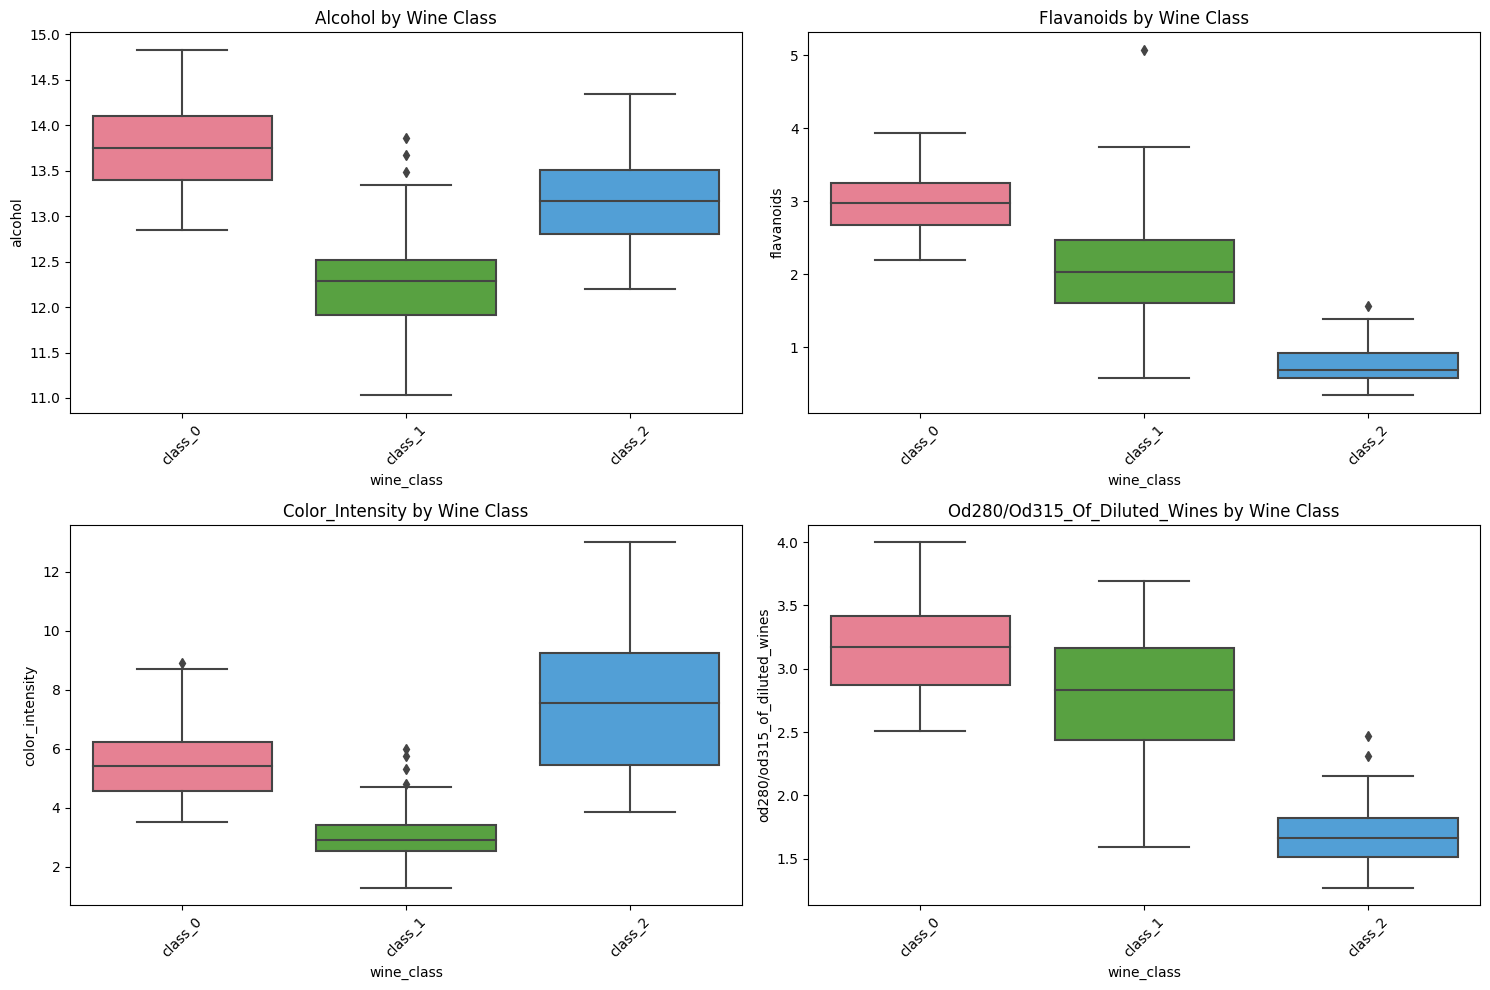


🎯 FEATURE RELATIONSHIPS BY WINE CLASS
---------------------------------------------


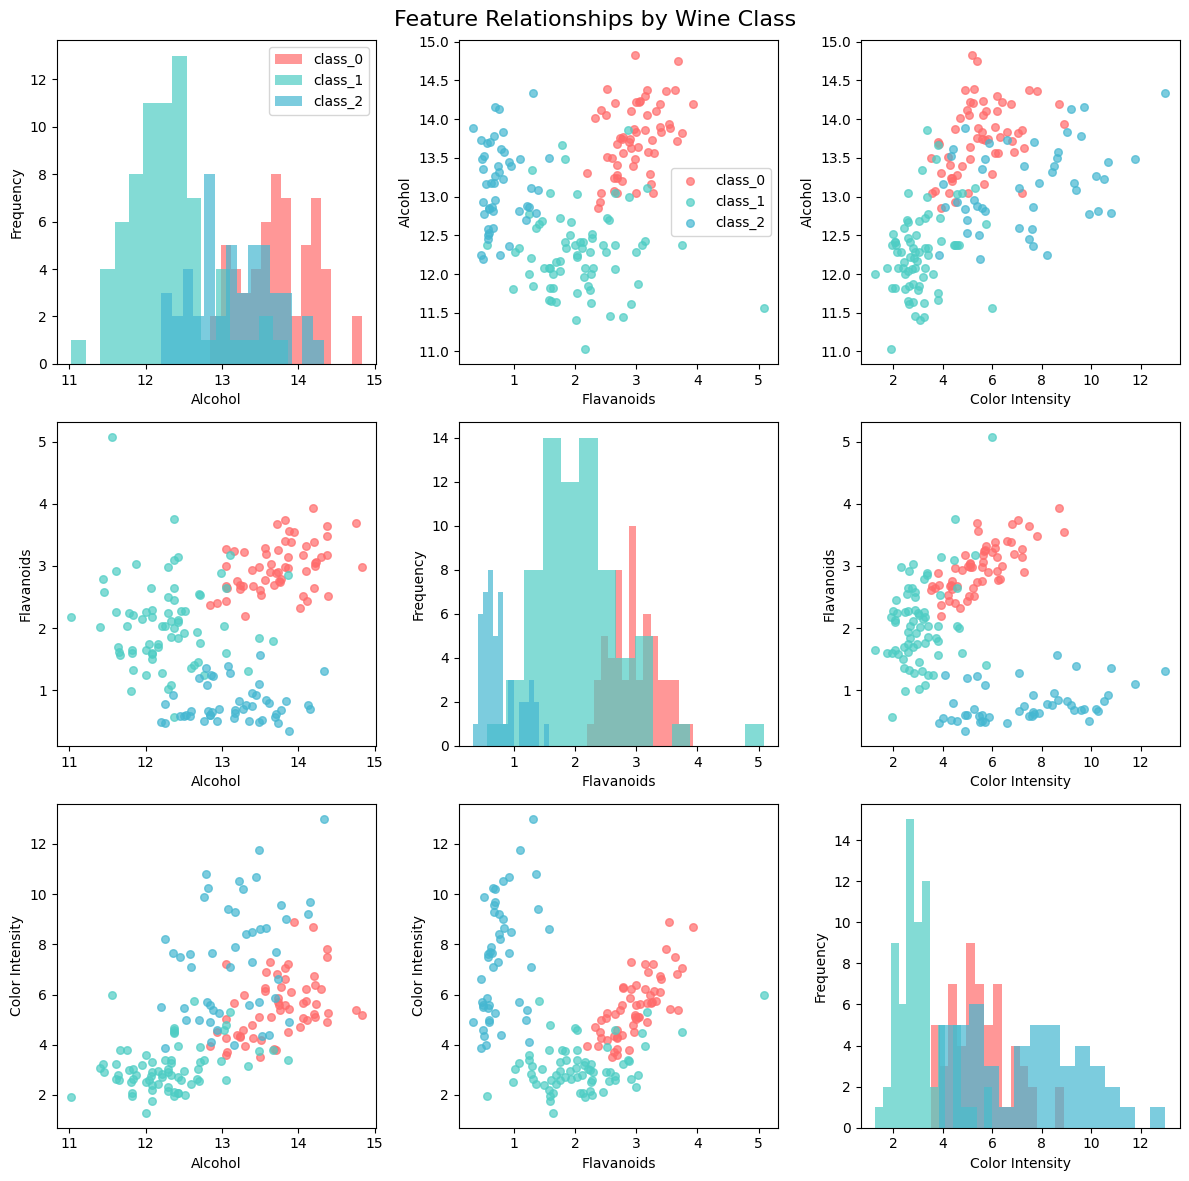

✅ Feature relationships plotted successfully!


In [0]:
# =============================================================================
# 4. FEATURE EXPLORATION AND VISUALIZATION
# =============================================================================

print("\n" + "="*60)
print("STEP 3: FEATURE EXPLORATION")
print("="*60)

# Let's look at the most interesting features
print("🔍 FEATURE NAMES AND DESCRIPTIONS")
print("-" * 40)
for i, feature in enumerate(wine.feature_names):
    print(f"{i+1:2d}. {feature}")

# Correlation matrix
print("\n📊 FEATURE CORRELATIONS")
print("-" * 30)

plt.figure(figsize=(14, 10))
correlation_matrix = df.iloc[:, :-2].corr()  # Exclude target columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Box plots for key features by wine class
key_features = ['alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='wine_class', y=feature, palette='husl')
    plt.title(f'{feature.title()} by Wine Class')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Pairplot for selected features - Using manual approach for compatibility
print("\n🎯 FEATURE RELATIONSHIPS BY WINE CLASS")
print("-" * 45)

# Skip seaborn pairplot due to version compatibility issues
# Create manual scatter plots that work reliably
selected_features = ['alcohol', 'flavanoids', 'color_intensity']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Feature Relationships by Wine Class', fontsize=16)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
wine_classes = df['wine_class'].unique()

for i, feat1 in enumerate(selected_features):
    for j, feat2 in enumerate(selected_features):
        ax = axes[i, j]
        if i == j:
            # Diagonal: histograms
            for idx, wine_class in enumerate(wine_classes):
                subset = df[df['wine_class'] == wine_class]
                ax.hist(subset[feat1], alpha=0.7, label=wine_class, 
                       bins=15, color=colors[idx])
            ax.set_xlabel(feat1.replace('_', ' ').title())
            ax.set_ylabel('Frequency')
            if i == 0:
                ax.legend()
        else:
            # Off-diagonal: scatter plots
            for idx, wine_class in enumerate(wine_classes):
                subset = df[df['wine_class'] == wine_class]
                ax.scatter(subset[feat2], subset[feat1], 
                         alpha=0.7, label=wine_class, color=colors[idx], s=30)
            ax.set_xlabel(feat2.replace('_', ' ').title())
            ax.set_ylabel(feat1.replace('_', ' ').title())
            if i == 0 and j == 1:
                ax.legend()

plt.tight_layout()
plt.show()

print("✅ Feature relationships plotted successfully!")

In [0]:
# =============================================================================
# 5. DATA PREPROCESSING
# =============================================================================

print("\n" + "="*60)
print("STEP 4: DATA PREPROCESSING")
print("="*60)

# Separate features and target
X = df.drop(['target', 'wine_class'], axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Check class distribution in splits
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts().sort_index())

# Feature scaling (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Data preprocessing completed!")
print("Features have been scaled to have mean=0 and std=1")


STEP 4: DATA PREPROCESSING
Features shape: (178, 13)
Target shape: (178,)

Training set: 124 samples
Test set: 54 samples

Class distribution in training set:
0    41
1    50
2    33
Name: target, dtype: int64

Class distribution in test set:
0    18
1    21
2    15
Name: target, dtype: int64

✅ Data preprocessing completed!
Features have been scaled to have mean=0 and std=1


In [0]:
# =============================================================================
# 6. MODEL TRAINING AND EVALUATION
# =============================================================================

print("\n" + "="*60)
print("STEP 5: CLASSIFICATION MODELS")
print("="*60)

# Dictionary to store models and results
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n🤖 Training {name}...")
    
    # Use scaled data for LogisticRegression and KNN, original for tree-based models
    if name in ['Logistic Regression', 'K-Nearest Neighbors']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    # Detailed classification report
    print(f"\nClassification Report for {name}:")
    print("-" * 50)
    print(classification_report(y_test, y_pred, target_names=target_names))


STEP 5: CLASSIFICATION MODELS

🤖 Training Logistic Regression...
Accuracy: 0.9815 (98.15%)

Classification Report for Logistic Regression:
--------------------------------------------------
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


🤖 Training Decision Tree...
Accuracy: 0.9630 (96.30%)

Classification Report for Decision Tree:
--------------------------------------------------
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro


STEP 6: MODEL COMPARISON
🏆 MODEL PERFORMANCE SUMMARY
----------------------------------------
                 Model  Accuracy
2        Random Forest  1.000000
0  Logistic Regression  0.981481
1        Decision Tree  0.962963
3  K-Nearest Neighbors  0.944444


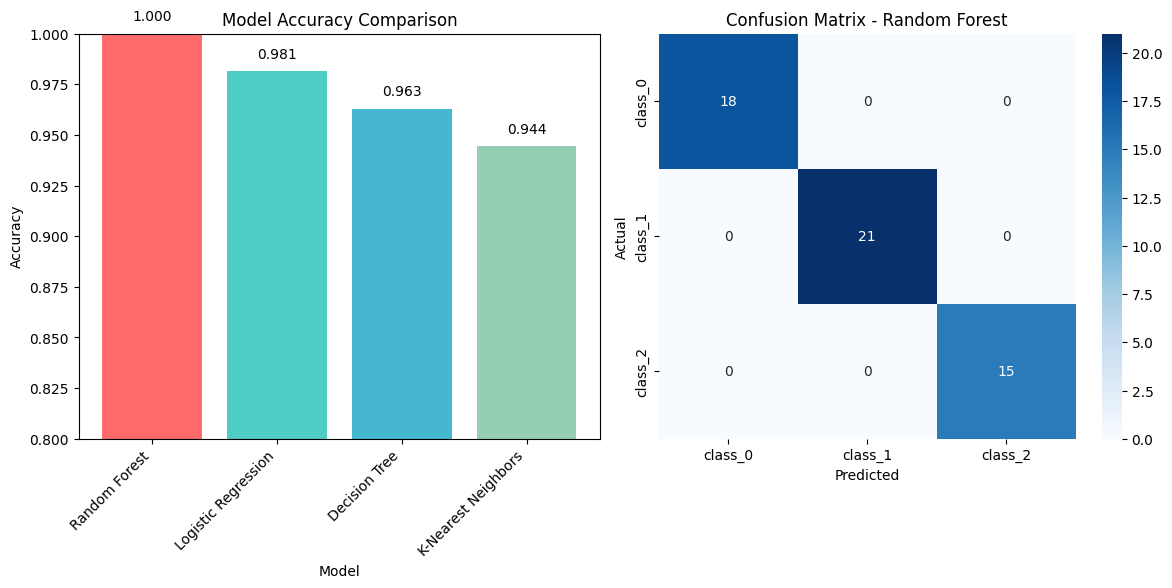

In [0]:
# =============================================================================
# 7. RESULTS COMPARISON AND VISUALIZATION
# =============================================================================

print("\n" + "="*60)
print("STEP 6: MODEL COMPARISON")
print("="*60)

# Compare model performances
print("🏆 MODEL PERFORMANCE SUMMARY")
print("-" * 40)
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)
print(results_df)

# Visualize model comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = plt.bar(results_df['Model'], results_df['Accuracy'], color=colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45, ha='right')

# Add accuracy labels on bars
for bar, accuracy in zip(bars, results_df['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{accuracy:.3f}', ha='center', va='bottom')

# Confusion matrix for best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

if best_model_name in ['Logistic Regression', 'K-Nearest Neighbors']:
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

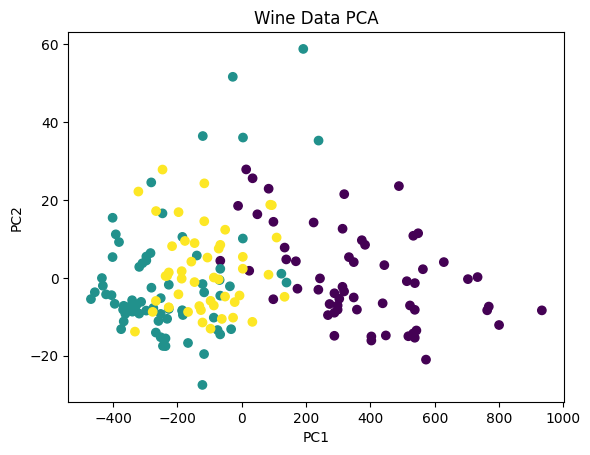

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(wine.data)

plt.scatter(components[:, 0], components[:, 1], c=wine.target, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Wine Data PCA')
plt.show()



STEP 7: FEATURE IMPORTANCE
🌟 TOP 10 MOST IMPORTANT FEATURES (Random Forest)
-------------------------------------------------------
                         feature  importance
0                        alcohol    0.162715
9                color_intensity    0.159719
6                     flavanoids    0.156283
12                       proline    0.124081
10                           hue    0.111019
11  od280/od315_of_diluted_wines    0.098852
5                  total_phenols    0.042004
4                      magnesium    0.034591
1                     malic_acid    0.033700
3              alcalinity_of_ash    0.028841


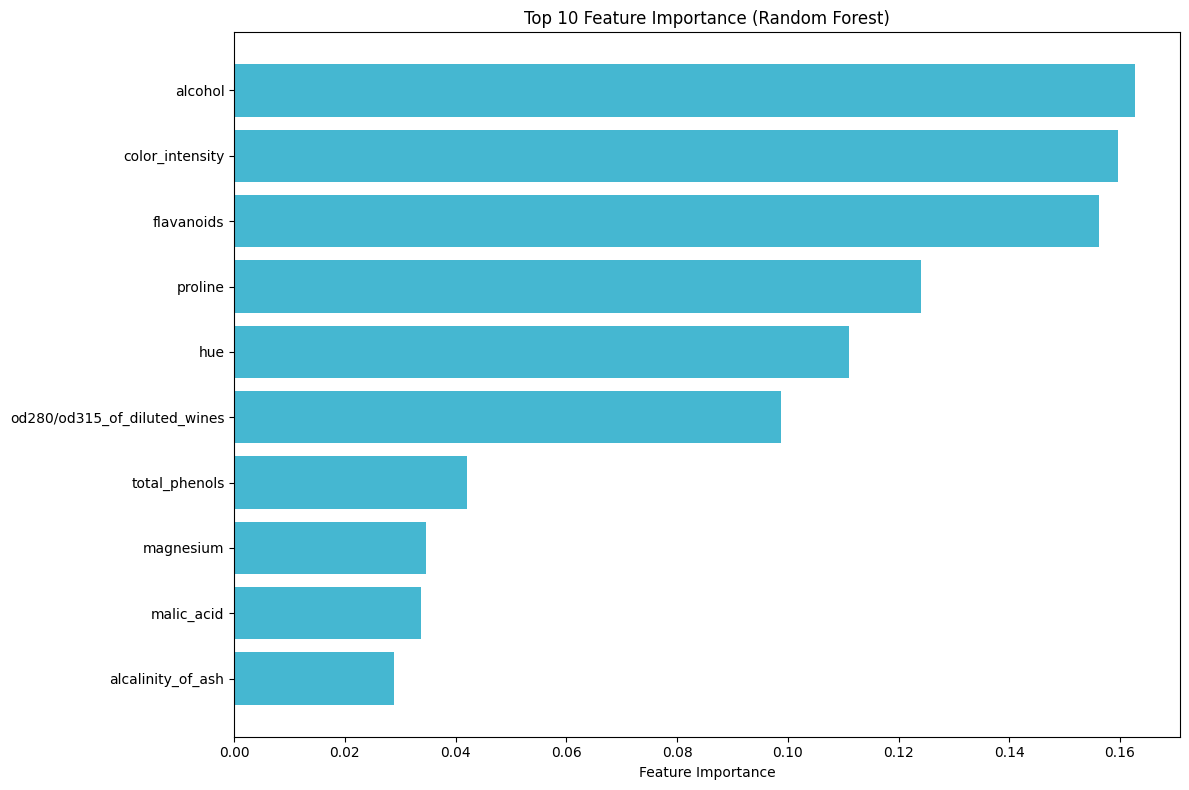

In [0]:
# =============================================================================
# 8. FEATURE IMPORTANCE (for tree-based models)
# =============================================================================

print("\n" + "="*60)
print("STEP 7: FEATURE IMPORTANCE")
print("="*60)

# Feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("🌟 TOP 10 MOST IMPORTANT FEATURES (Random Forest)")
print("-" * 55)
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'], color='#45B7D1')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [0]:
# =============================================================================
# 9. WORKSHOP EXERCISES AND CHALLENGES
# =============================================================================

print("\n" + "="*60)
print("WORKSHOP EXERCISES & CHALLENGES")
print("="*60)

print("""
🎯 HANDS-ON EXERCISES:

1. **Data Exploration Challenge**
   - Find the feature with the highest correlation to the target
   - Identify which wine class has the highest average alcohol content
   - Create a histogram of any feature and discuss its distribution

2. **Visualization Challenge**
   - Create a scatter plot of alcohol vs flavanoids, colored by wine class
   - Make a violin plot showing the distribution of color_intensity by class
   - Plot the correlation between any two features of your choice

3. **Model Tuning Challenge**
   - Try different values of k for KNN (k=3, 7, 10)
   - Experiment with different max_depth for Decision Tree (3, 5, 10, None)
   - Add more trees to Random Forest and see if accuracy improves

4. **Advanced Challenge**
   - Select only the top 5 most important features and retrain models
   - Try different train/test splits (70/30, 80/20) and compare results
   - Implement cross-validation for more robust evaluation

5. **Real-World Application**
   - If you were a winery, which model would you choose and why?
   - What additional features might help improve classification?
   - How would you handle new wine samples in production?
""")


WORKSHOP EXERCISES & CHALLENGES

🎯 HANDS-ON EXERCISES:

1. **Data Exploration Challenge**
   - Find the feature with the highest correlation to the target
   - Identify which wine class has the highest average alcohol content
   - Create a histogram of any feature and discuss its distribution

2. **Visualization Challenge**
   - Create a scatter plot of alcohol vs flavanoids, colored by wine class
   - Make a violin plot showing the distribution of color_intensity by class
   - Plot the correlation between any two features of your choice

3. **Model Tuning Challenge**
   - Try different values of k for KNN (k=3, 7, 10)
   - Experiment with different max_depth for Decision Tree (3, 5, 10, None)
   - Add more trees to Random Forest and see if accuracy improves

4. **Advanced Challenge**
   - Select only the top 5 most important features and retrain models
   - Try different train/test splits (70/30, 80/20) and compare results
   - Implement cross-validation for more robust evaluation

5

In [0]:
# =============================================================================
# 10. SUMMARY AND CONCLUSIONS
# =============================================================================

print("\n" + "="*60)
print("SUMMARY & CONCLUSIONS")
print("="*60)

best_accuracy = results_df.iloc[0]['Accuracy']
best_model = results_df.iloc[0]['Model']

print(f"""
🍷 WORKSHOP SUMMARY:

✅ Dataset: Wine Recognition Dataset
   - 178 samples, 13 features, 3 classes
   - Well-balanced dataset with no missing values
   - Chemical features provide good class separation

✅ Best Model: {best_model}
   - Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)
   - All models performed excellently (>90% accuracy)
   - This suggests the features are highly predictive

✅ Key Insights:
   - Features like flavanoids and color_intensity are most important
   - Wine classes are well-separated in feature space
   - Simple models work very well on this dataset

🎓 Learning Outcomes:
   - Data exploration and visualization techniques
   - Classification model comparison
   - Feature importance analysis
   - Model evaluation with multiple metrics

Next Steps:
   - Try ensemble methods or neural networks
   - Explore dimensionality reduction (PCA)
   - Apply these techniques to other datasets
""")

print("\n🎉 Congratulations! You've completed the Wine Classification Workshop!")
print("Keep practicing with different datasets to master data science skills!")


SUMMARY & CONCLUSIONS

🍷 WORKSHOP SUMMARY:

✅ Dataset: Wine Recognition Dataset
   - 178 samples, 13 features, 3 classes
   - Well-balanced dataset with no missing values
   - Chemical features provide good class separation

✅ Best Model: Random Forest
   - Accuracy: 1.0000 (100.00%)
   - All models performed excellently (>90% accuracy)
   - This suggests the features are highly predictive

✅ Key Insights:
   - Features like flavanoids and color_intensity are most important
   - Wine classes are well-separated in feature space
   - Simple models work very well on this dataset

🎓 Learning Outcomes:
   - Data exploration and visualization techniques
   - Classification model comparison
   - Feature importance analysis
   - Model evaluation with multiple metrics

Next Steps:
   - Try ensemble methods or neural networks
   - Explore dimensionality reduction (PCA)
   - Apply these techniques to other datasets


🎉 Congratulations! You've completed the Wine Classification Workshop!
Keep prac

## 🌳 Decision Tree Classifier & Evaluation Metrics

A **Decision Tree** is a simple, interpretable model that predicts a class by asking a series of **if/else** questions on features.
- It **recursively splits** the data into smaller groups to increase class purity at each step.
- Common split criteria: **Gini impurity** (default in scikit-learn) or **Entropy** (information gain).
- Key hyperparameters to prevent overfitting:  
  - `max_depth`: maximum depth of the tree  
  - `min_samples_split`: minimum samples to split a node  
  - `min_samples_leaf`: minimum samples at a leaf  
  - `max_features`: number of features considered at each split

We’ll train a Decision Tree on a train/test split and then evaluate it with standard **classification metrics**:

### 📏 Metrics (per class unless stated otherwise)
- **Precision** = TP / (TP + FP)  
  Of the items predicted as this class, how many were correct?

- **Recall** (Sensitivity) = TP / (TP + FN)  
  Of the items that truly belong to this class, how many did we find?

- **F1-score** = 2 × (Precision × Recall) / (Precision + Recall)  
  Harmonic mean of precision and recall; balances false positives and false negatives.

- **Support**  
  The **number of true instances** of each class in the test set.

- **Accuracy** (overall) = (Total correct predictions) / (Total predictions)  
  One number for the whole model; can be misleading with imbalanced classes, so read it **alongside** precision/recall/F1.

> Tip: For a quick visual check, also look at the **confusion matrix**—it shows where the model confuses one class for another.


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("Logistic Regression:\n", classification_report(y_test, lr.predict(X_test)))

# Decision Tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree:\n", classification_report(y_test, dt.predict(X_test)))


Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Decision Tree:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



## 📊 Confusion Matrix

A **confusion matrix** is a table that shows how well our classifier performed by comparing the **true labels** with the **predicted labels**.  

- The **rows** represent the actual classes.  
- The **columns** represent the predicted classes.  
- The **diagonal cells** (top-left to bottom-right) show the number of **correct predictions**.  
- The **off-diagonal cells** show where the model made mistakes (misclassifications).  

For example:  
- If the entry in row 1, column 2 is high, it means many wines from class 1 were incorrectly predicted as class 2.  
- A perfect model would have all values on the diagonal and zeros everywhere else.  

Using the confusion matrix helps us see **which classes are confused with each other**, something accuracy alone doesn’t tell us.


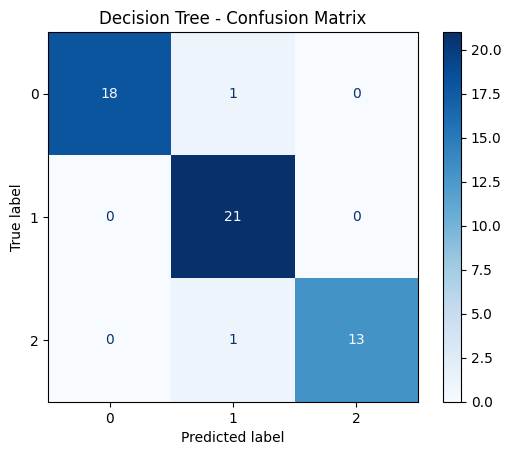

In [0]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions from the decision tree
y_pred = dt.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)

# Display confusion matrix with nice formatting
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Decision Tree - Confusion Matrix")
plt.show()
